By the end of this mini project, you will need to deliver within your code:
1: Multiple accuracy measures resembling different k-neighbors used for training your k-nearest neighbor (KNN) classifier.
2: One printed confusion matrix for the best model.

In [6]:
# load dataset, arff to csv based on the codes from https://www.kaggle.com/code/gauravduttakiit/arff-to-csv

import pandas as pd
from scipy.io import arff

data = arff.loadarff('C:/Users/ktang28/ML_Mini_Project_CreditRisks/dataset_31_credit-g.arff')
train= pd.DataFrame(data[0])
train.head()
                 


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [8]:
catCols = [col for col in train.columns if train[col].dtype=="O"]
catCols[:5]

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment']

In [9]:
train[catCols]=train[catCols].apply(lambda x: x.str.decode('utf8'))
train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [10]:
train.to_csv('C:/Users/ktang28/ML_Mini_Project_CreditRisks/dataset_credit-g.csv',index=False)

In [11]:
df = pd.read_csv('C:/Users/ktang28/ML_Mini_Project_CreditRisks/dataset_credit-g.csv')
df.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [12]:
df.shape

(1000, 21)

In [13]:
# drop missing values
df.dropna()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [14]:
from sklearn.preprocessing import LabelEncoder
df["class"] = LabelEncoder().fit_transform(df["class"])
df.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,1
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,1
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,1
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,0


<Axes: >

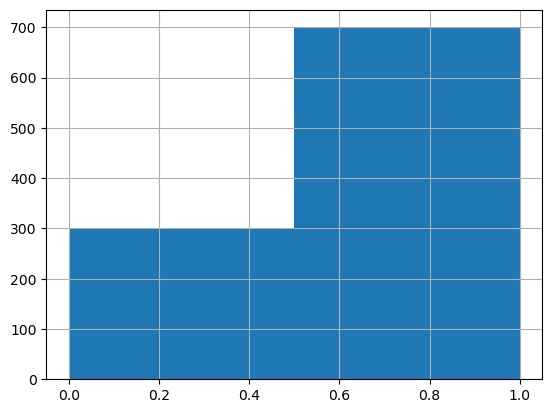

In [18]:
import matplotlib.pyplot as plt
df["class"].hist(bins = 2)

C:\Users\ktang28\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


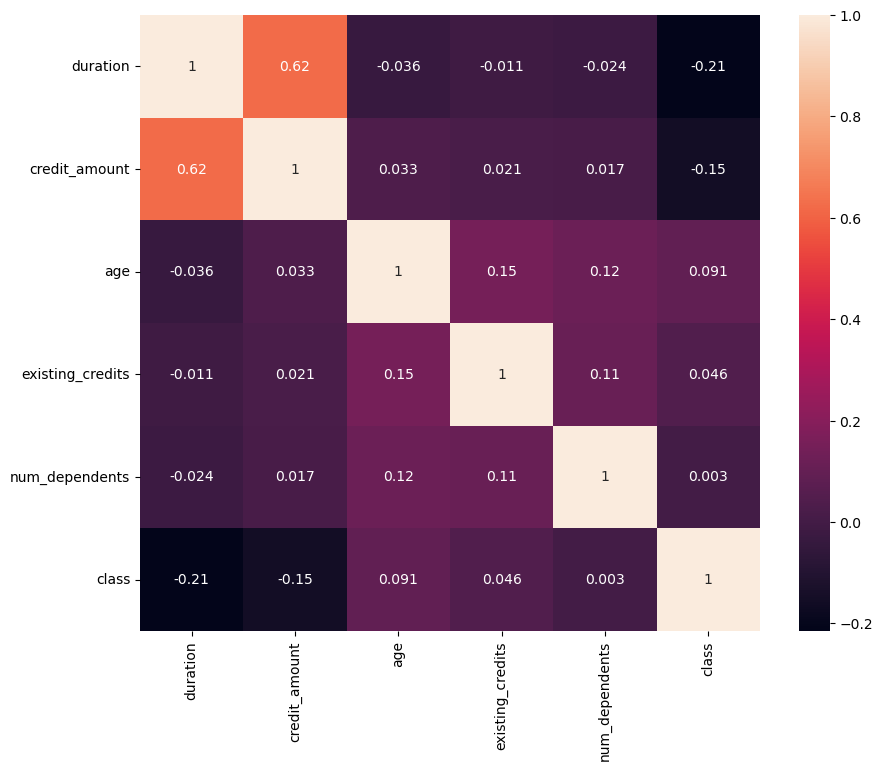

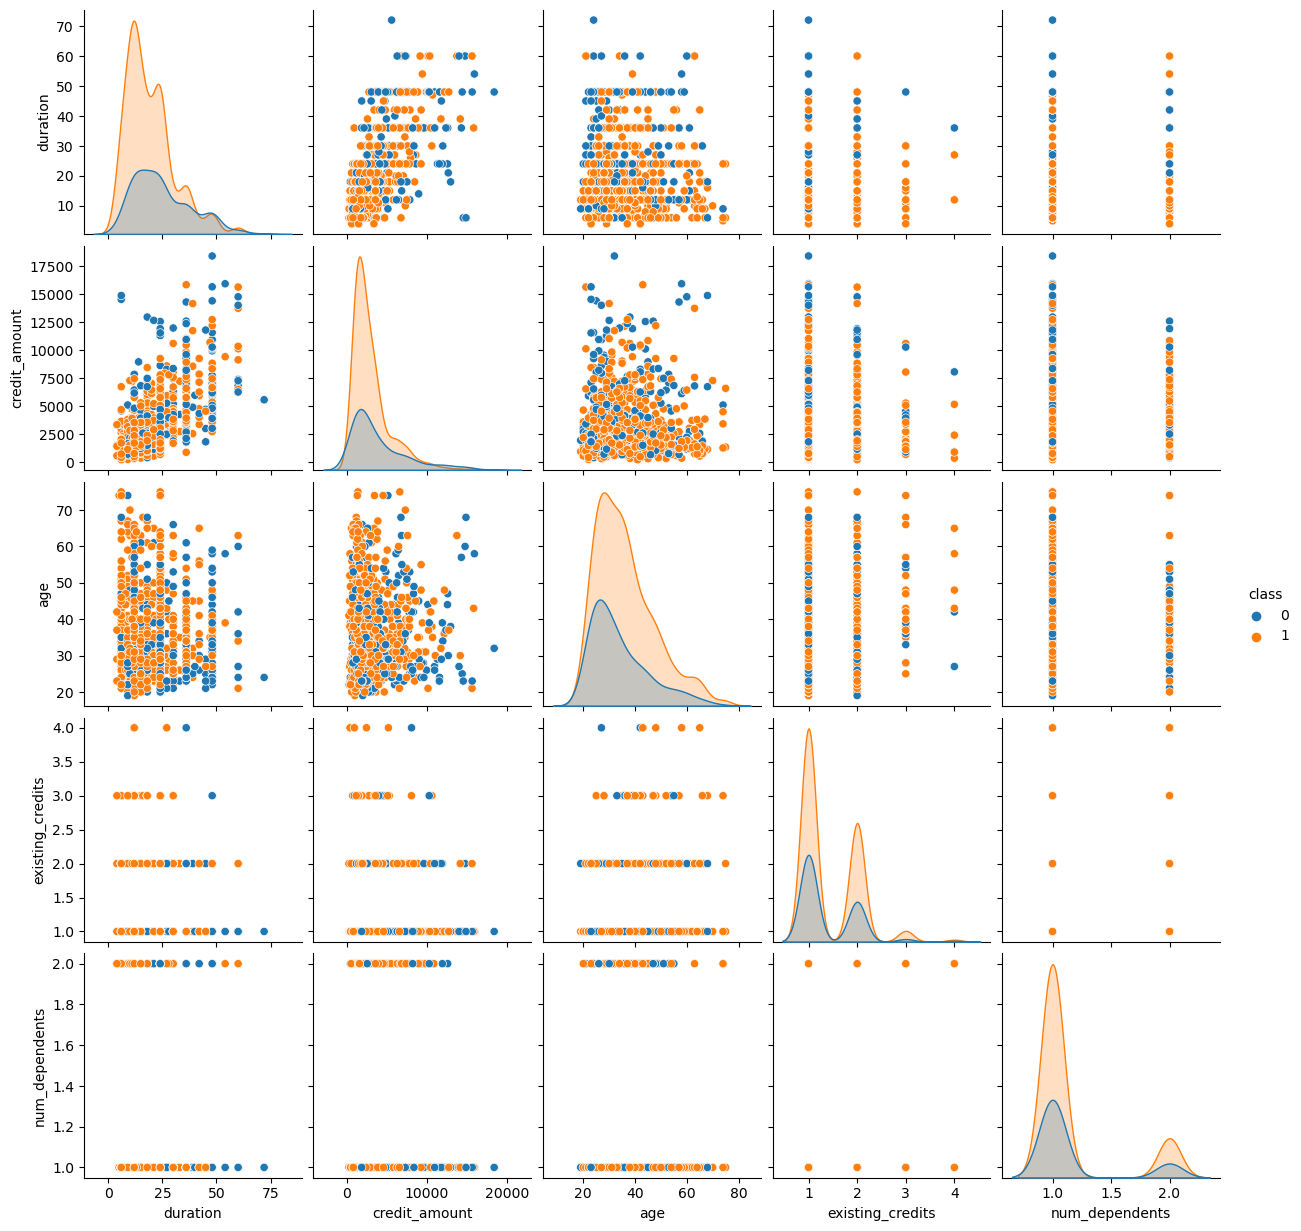

In [33]:
import seaborn as sns

plt.figure(figsize=(10,8))
num = df[["duration","credit_amount","age","existing_credits","num_dependents","class"]]
sns.heatmap(num.corr(),annot = True)
sns.pairplot(num, hue = "class")

In [26]:
categorical = df[["credit_history", "purpose", "savings_status","employment", "housing","job"]]

In [27]:
categorical

,credit_history,purpose,savings_status,employment,housing,job
0,critical/other existing credit,radio/tv,no known savings,>=7,own,skilled
1,existing paid,radio/tv,<100,1<=X<4,own,skilled
2,critical/other existing credit,education,<100,4<=X<7,own,unskilled resident
3,existing paid,furniture/equipment,<100,4<=X<7,for free,skilled
4,delayed previously,new car,<100,1<=X<4,for free,skilled
...,...,...,...,...,...,...
995,existing paid,furniture/equipment,<100,4<=X<7,own,unskilled resident
996,existing paid,used car,<100,1<=X<4,own,high qualif/self emp/mgmt
997,existing paid,radio/tv,<100,>=7,own,skilled
998,existing paid,radio/tv,<100,1<=X<4,for free,skilled


In [29]:
# preprocessing: scaling, encoding, Nan values
categorical = pd.get_dummies(categorical).astype(int)

categorical

,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,...,employment_<1,employment_>=7,employment_unemployed,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
997,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [34]:

nominal = df[["duration","credit_amount","age","existing_credits","num_dependents"]]
credit = pd.concat([nominal,categorical], axis = 1)
credit

,duration,credit_amount,age,existing_credits,num_dependents,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,...,employment_<1,employment_>=7,employment_unemployed,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,6.0,1169.0,67.0,2.0,1.0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,48.0,5951.0,22.0,1.0,1.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,12.0,2096.0,49.0,1.0,2.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,42.0,7882.0,45.0,1.0,2.0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,24.0,4870.0,53.0,2.0,2.0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,31.0,1.0,1.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
996,30.0,3857.0,40.0,1.0,1.0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
997,12.0,804.0,38.0,1.0,1.0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
998,45.0,1845.0,23.0,1.0,1.0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [36]:
# split data
y = df["class"].values
x_columns = len(credit.columns)

x = credit.iloc[:,0:x_columns].values


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [47]:
X_validate, X_test, y_validata, y_test = train_test_split(X_test, y_test,test_size = 0.5, random_state = 0)
print(len(X_train), len(X_test),len(X_validate))

800 100 100


In [50]:
# train model using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)


0.67

In [52]:
scores = []
neighbors = range(1,20)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    results = knn.score(X_test,y_test)
    scores.append(results)
print(scores)

[0.59, 0.51, 0.67, 0.61, 0.67, 0.67, 0.67, 0.63, 0.68, 0.67, 0.67, 0.65, 0.68, 0.64, 0.67, 0.64, 0.66, 0.66, 0.67]


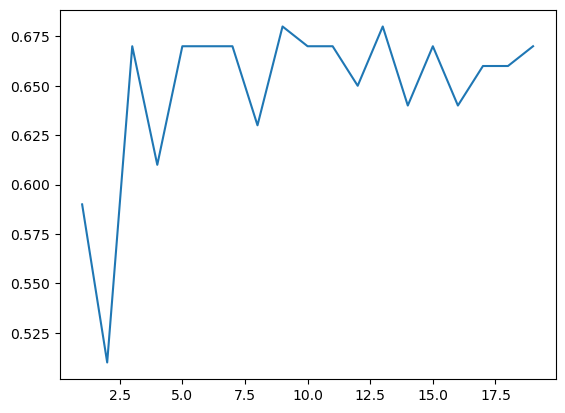

In [53]:
plt.plot(neighbors, scores)

In [54]:
knn = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)

In [56]:
result = knn.score(X_validate, y_validata)
print(result)

0.68


In [59]:
from sklearn.metrics import confusion_matrix
preditions = knn.predict(X_validate)
print(confusion_matrix(y_validata,preditions))

[[ 6 23]
 [ 9 62]]


In [62]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)
results = model.score(X_test, y_test)
print(results)

0.53
